1.Set Up

In this initial part, I have import all the necessary libraries and modules that will be used throughout the project. This includes libraries for handling arrays (numpy), image processing (cv2 or OpenCV), machine learning algorithms (sklearn.neighbors for KNN, sklearn.metrics for evaluating accuracy, sklearn.model_selection for model tuning, and sklearn.preprocessing for data scaling).

In [18]:
# Import necessary libraries
import os
import cv2
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler


2. Data Loading

I have define a function load_data to load the images and their corresponding labels from the specified directory. This function iterates through folders (each representing a class/label), loads each image in grayscale format, and stores them in a list alongside their labels. This is done separately for training and testing datasets, preparing data for further processing and model training.

In [19]:
def load_data(data_dir):
    images = []
    labels = []
    for folder in os.listdir(data_dir):
        label = folder
        folder_path = os.path.join(data_dir, folder)
        for filename in os.listdir(folder_path):
            image_path = os.path.join(folder_path, filename)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            images.append(image)
            labels.append(label)
    return images, labels

# Load training and testing data
training_data_dir = '/kaggle/input/standard-ocr-dataset/data/testing_data'
testing_data_dir = '/kaggle/input/standard-ocr-dataset/data/training_data'
train_images, train_labels = load_data(training_data_dir)
test_images, test_labels = load_data(testing_data_dir)


3. Data Processing

In this step, I have process the loaded images to make them suitable for feeding into the KNN model. This involves resizing the images to a uniform size (e.g., 32x32 pixels) and flattening them into one-dimensional arrays. Additionally, I have normalize the data using StandardScaler from scikit-learn, which standardizes the features by removing the mean and scaling to unit variance. This is important because KNN performs better when features are on the same scale.



In [20]:
def load_data(data_dir):
    images = []
    labels = []
    for folder in os.listdir(data_dir):
        label = folder
        folder_path = os.path.join(data_dir, folder)
        for filename in os.listdir(folder_path):
            image_path = os.path.join(folder_path, filename)
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            images.append(image)
            labels.append(label)
    return images, labels

# Load training and testing data
training_data_dir ='/kaggle/input/standard-ocr-dataset/data/training_data'
testing_data_dir = '/kaggle/input/standard-ocr-dataset/data/testing_data'
train_images, train_labels = load_data(training_data_dir)
test_images, test_labels = load_data(testing_data_dir)


In [21]:
def preprocess_data(images):
    processed_images = []
    for img in images:
        img = cv2.resize(img, (32, 32))  # Resize images
        processed_images.append(img.flatten())  # Flatten images
    return np.array(processed_images)

# Process training and testing data
X_train = preprocess_data(train_images)
X_test = preprocess_data(test_images)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


4. Data Visualization

Data visualization is crucial for understanding the nature of our data. In this section, I have created a function display_images to display a subset of the images along with their labels. This helps in visually inspecting the data to ensure it's loaded and processed correctly. It also gives an intuitive understanding of the types of characters KNN model will be working with.

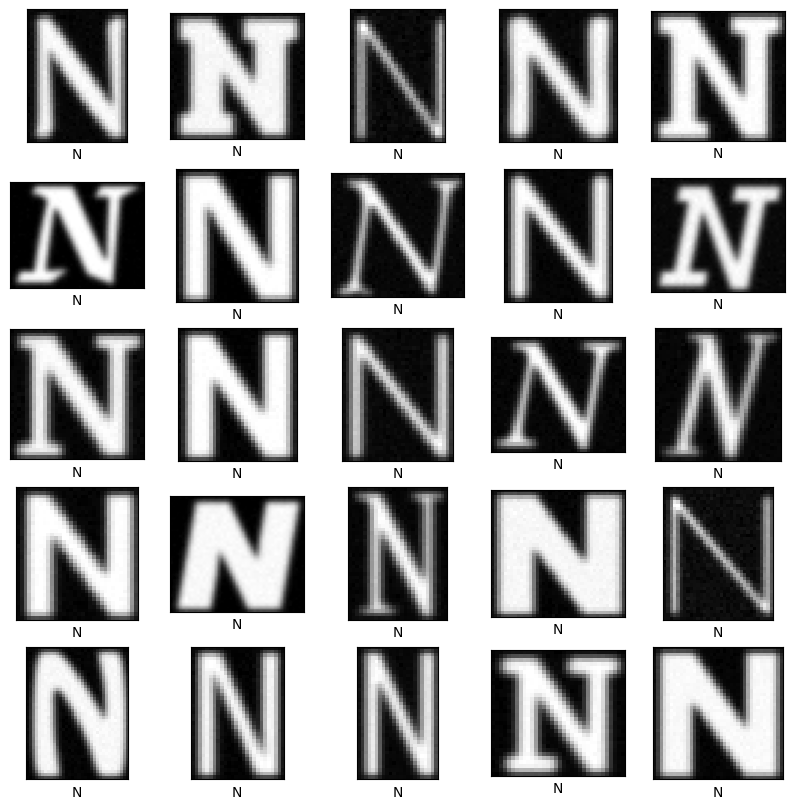

In [22]:
import matplotlib.pyplot as plt

def display_images(images, labels):
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(images[i], cmap=plt.cm.binary)
        plt.xlabel(labels[i])
    plt.show()

# Display a sample of training images
display_images(train_images[:25], train_labels[:25])


5. Model Building

This part focuses on building and tuning the KNN model. I have use GridSearchCV for hyperparameter tuning, which is a method of systematically working through multiple combinations of parameter tunes, cross-validating as it goes to determine which tune gives the best performance. I have train the model with different values of k (number of neighbors) and weights (uniform or distance-based), and then select the best model based on cross-validation performance.

In [23]:
# Create a KNN classifier and use GridSearchCV for hyperparameter tuning
knn_classifier = KNeighborsClassifier()
parameters = {'n_neighbors': range(1, 10), 'weights': ['uniform', 'distance']}
clf = GridSearchCV(knn_classifier, parameters, cv=5)
clf.fit(X_train, train_labels)

# Evaluate the best model found by GridSearchCV
best_knn = clf.best_estimator_
print("Best KNN Parameters:", clf.best_params_)


Best KNN Parameters: {'n_neighbors': 4, 'weights': 'distance'}


6. Model Predictions

After training and fine-tuning the model, I have use it to make predictions on the test dataset. This is where you evaluate how well KNN model performs on unseen data. The accuracy of the model is computed using accuracy_score which compares the predicted labels against the actual labels of the test dataset. Additionally, I have visualize some of the test images alongside the predicted labels to get a more intuitive understanding of the model's performance and where it might be making errors. This section is key for assessing the effectiveness of your model and identifying areas for improvement.

Accuracy: 0.9692460317460317


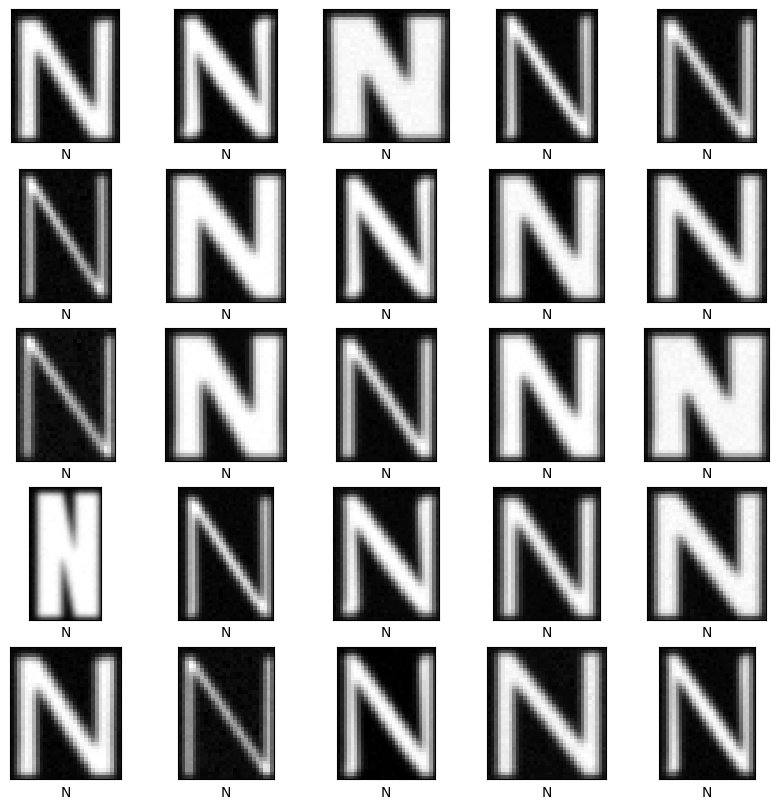

In [24]:
# Make predictions on the test set
y_pred = best_knn.predict(X_test)
accuracy = accuracy_score(test_labels, y_pred)
print("Accuracy:", accuracy)

# Optionally, display some test images along with predicted labels
display_images(test_images[:25], y_pred[:25])
